In [1]:
import os
import numpy as np
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Cardinallop/Titanic/master/"
TITANIC_PATH = os.path.join("datasets", "titanicData")
TITANIC_URL = DOWNLOAD_ROOT + "train.csv"
TITANICTEST_URL = DOWNLOAD_ROOT + "test.csv"

def fetch_train_data(titanic_url=TITANIC_URL, titanic_path=TITANIC_PATH):
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    tgz_path = os.path.join(titanic_path, "train.csv")
    urllib.request.urlretrieve(titanic_url, tgz_path)
    

def fetch_test_data(titanic_url=TITANICTEST_URL, titanic_path=TITANIC_PATH):
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    tgz_path = os.path.join(titanic_path, "test.csv")
    urllib.request.urlretrieve(titanic_url, tgz_path)

In [2]:
fetch_train_data()
fetch_test_data()

In [3]:
import pandas as pd

def load_train_data(titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, "train.csv")
    return pd.read_csv(csv_path)

def load_test_data(titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, "test.csv")
    return pd.read_csv(csv_path)

In [4]:
train = load_train_data()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = load_test_data()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### If you look at the training data info above, there is total of 891 values, however, the categories of Age and Cabin has a lot of missing values; we have to take care fo that if we want to make a good prediction. 

In [7]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


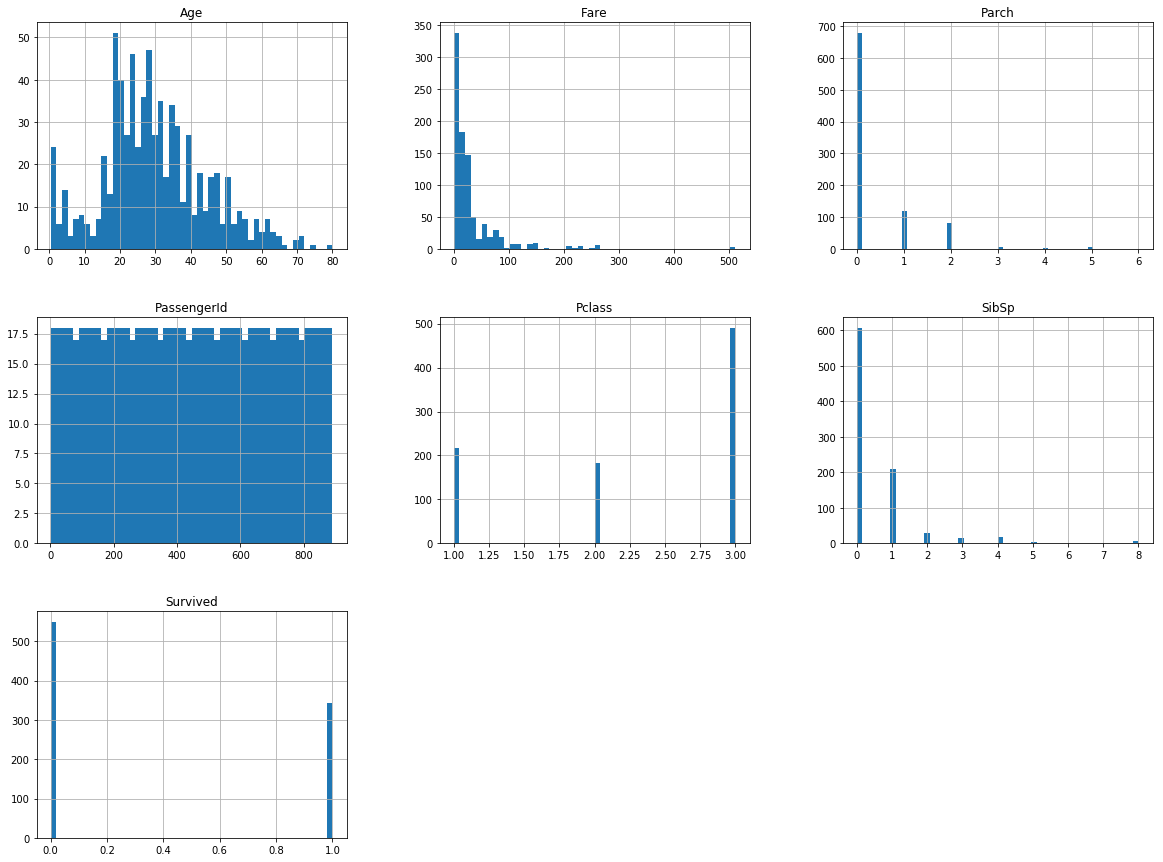

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 
train.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

In [12]:
len(train_set)

712

In [13]:
len(test_set)

179

In [14]:
train = train_set.copy()

In [15]:
corr_matrix = train.corr()

In [16]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.246641
Parch          0.078311
PassengerId    0.019979
SibSp         -0.047602
Age           -0.059695
Pclass        -0.321750
Name: Survived, dtype: float64

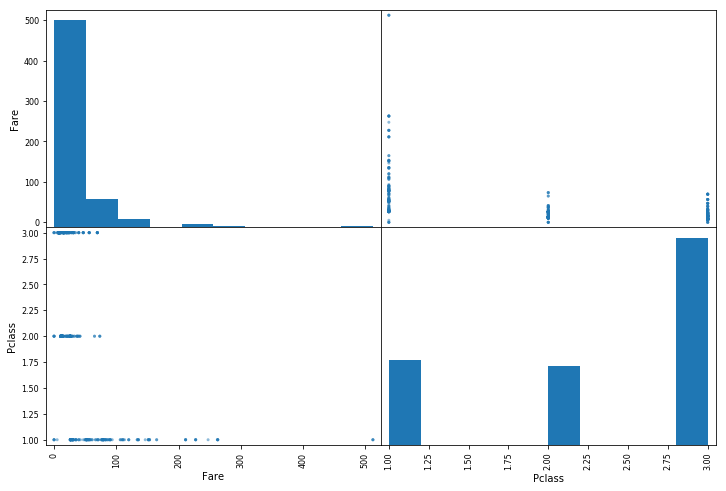

In [128]:
from pandas.plotting import scatter_matrix

attributes = ["Fare", "Pclass"]
scatter_matrix(train[attributes], figsize=(12, 8))
plt.show()


# I should apply different colors for each attribute later..

In [22]:
train = train_set.drop("Survived", axis=1)
train_labels = train_set["Survived"].copy() 

In [23]:
train = train.drop("Cabin", axis=1)
train = train.drop("Embarked", axis=1)
median = train["Age"].median()
train["Age"].fillna(median, inplace=True)


# I should check ack here for possible errors

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

train_num = train.drop("PassengerId", axis=1)
train_num = train_num.drop("Name", axis=1)
train_num = train_num.drop("Sex", axis=1)
train_num = train_num.drop("Ticket", axis=1)


In [26]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 5 columns):
Pclass    712 non-null int64
Age       712 non-null float64
SibSp     712 non-null int64
Parch     712 non-null int64
Fare      712 non-null float64
dtypes: float64(2), int64(3)
memory usage: 33.4 KB


In [27]:
imputer.fit(train_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([ 3.    , 28.    ,  0.    ,  0.    , 14.4542])

In [29]:
train_num.median().values

array([ 3.    , 28.    ,  0.    ,  0.    , 14.4542])

In [30]:
X = imputer.transform(train_num)

In [31]:
titanic_tr = pd.DataFrame(X, columns=train_num.columns)

In [32]:
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 5 columns):
Pclass    712 non-null float64
Age       712 non-null float64
SibSp     712 non-null float64
Parch     712 non-null float64
Fare      712 non-null float64
dtypes: float64(5)
memory usage: 27.9 KB


In [33]:
titanic_tr.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,45.5,0.0,0.0,28.5000
1,2.0,23.0,0.0,0.0,13.0000
2,3.0,32.0,0.0,0.0,7.9250
3,3.0,26.0,1.0,0.0,7.8542
4,3.0,6.0,4.0,2.0,31.2750


In [34]:
train_cat = train[["Sex"]]
train_cat.head()

,Sex
331,male
733,male
382,male
704,male
813,female


In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)
train_cat_encoded[:10]


array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_num_tr = num_pipeline.fit_transform(train_num)

In [37]:
train_num_tr

array([[-1.61413602,  1.25364106, -0.47072241, -0.47934164, -0.07868358],
       [-0.40055118, -0.47728355, -0.47072241, -0.47934164, -0.37714494],
       [ 0.81303367,  0.21508629, -0.47072241, -0.47934164, -0.47486697],
       ...,
       [ 0.81303367,  0.90745614,  1.23056874, -0.47934164, -0.35580399],
       [-1.61413602, -1.1696534 ,  0.37992316,  2.04874166,  1.68320121],
       [-1.61413602, -0.63114352, -0.47072241,  0.78470001,  0.86074761]])

In [38]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_num)
cat_attribs = ["Sex"]


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train_set)

In [39]:
train_prepared

array([[-1.61413602,  1.25364106, -0.47072241, -0.47934164, -0.07868358,
         1.        ],
       [-0.40055118, -0.47728355, -0.47072241, -0.47934164, -0.37714494,
         1.        ],
       [ 0.81303367,  0.21508629, -0.47072241, -0.47934164, -0.47486697,
         1.        ],
       ...,
       [ 0.81303367,  0.90745614,  1.23056874, -0.47934164, -0.35580399,
         1.        ],
       [-1.61413602, -1.1696534 ,  0.37992316,  2.04874166,  1.68320121,
         0.        ],
       [-1.61413602, -0.63114352, -0.47072241,  0.78470001,  0.86074761,
         1.        ]])

# 1-Model:  DecisionTree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_prepared, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Testing and validation in a small scale:

In [45]:
some_dat = train.iloc[:5]
some_labs = train_labels.iloc[:5]
some_dat_prepared = full_pipeline.transform(some_dat)
print("Predictions:", tree_clf.predict(some_dat_prepared))

print("Labels:", list(some_labs))


Predictions: [0 0 0 0 0]
Labels: [0, 0, 0, 0, 0]


#### Checking the Cross Val Score:

In [50]:
from sklearn.model_selection import cross_val_score
cvsscores = cross_val_score(tree_clf, train_prepared, train_labels,
                         scoring="accuracy", cv=10)

In [51]:
>>> def display_scores(scores):
...     print("Scores:", scores)
...     print("Mean:", scores.mean())
...     print("Standard deviation:", scores.std())
...
>>> display_scores(cvsscores)


Scores: [0.77777778 0.72222222 0.72222222 0.77777778 0.78873239 0.74647887
 0.78873239 0.76056338 0.82857143 0.75714286]
Mean: 0.7670221327967807
Standard deviation: 0.03088326340076325


#### Confusion Matrix:

In [62]:
train_predo = cross_val_predict(tree_clf, train_prepared, train_labels, cv=10)

In [63]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(train_labels, train_predo)

array([[356,  88],
       [ 85, 183]])

#### Precision and Recall

In [64]:
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(train_labels, train_predo)

0.6752767527675276

In [65]:
>>> recall_score(train_labels, train_predo) 

0.6828358208955224

#### F-score

In [66]:
>>> from sklearn.metrics import f1_score
>>> f1_score(train_labels, train_predo)

0.6790352504638218

#### P&R Curve

In [69]:
y_scores = cross_val_predict(tree_clf, train_prepared, train_labels, cv=3)

In [71]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(train_labels, y_scores)

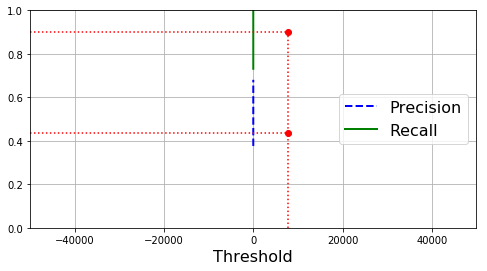

In [77]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])            

plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([7813, 7813], [0., 0.9], "r:")         
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
plt.plot([7813], [0.9], "ro")                   
plt.plot([7813], [0.4368], "ro")                

plt.show()

In [78]:
(train_predo == (y_scores > 0)).all()

False

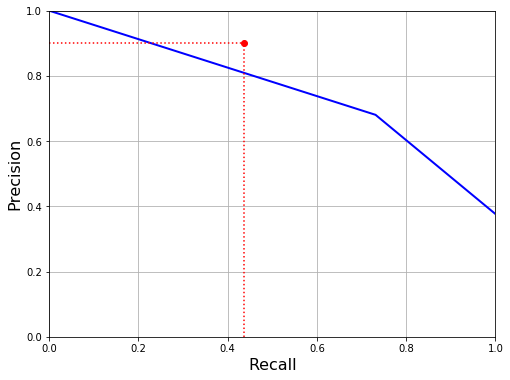

In [80]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")

plt.show()


#### ROC Curve

In [82]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_labels, y_scores)

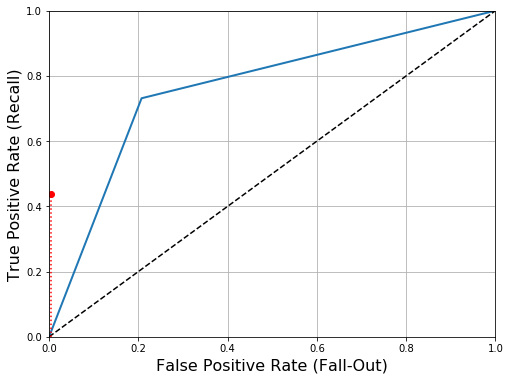

In [84]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
                      
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_labels, y_scores)

0.7620680381874412

# 2-Model:  RandomForestRegressor

In [86]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(train_prepared, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Test and Validation:

In [88]:
some_datq = train.iloc[:5]
some_labsq = train_labels.iloc[:5]
some_dat_preparedq = full_pipeline.transform(some_datq)
print("Predictions:", forest_clf.predict(some_dat_preparedq))

print("Labels:", list(some_labsq))

Predictions: [0 0 0 0 0]
Labels: [0, 0, 0, 0, 0]


#### Cross Val Score:

In [90]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, train_prepared, train_labels,
                                scoring="accuracy", cv=10)

display_scores(forest_scores)

Scores: [0.81944444 0.80555556 0.77777778 0.83333333 0.83098592 0.77464789
 0.74647887 0.8028169  0.85714286 0.78571429]
Mean: 0.8033897831433043
Standard deviation: 0.03137462807069756


#### Confusion Matrix

In [91]:
train_predo1 = cross_val_predict(forest_clf, train_prepared, train_labels, cv=10)

In [92]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(train_labels, train_predo1)

array([[381,  63],
       [ 77, 191]])

#### Precision and Recall

In [93]:
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(train_labels, train_predo1)

0.7519685039370079

In [94]:
>>> recall_score(train_labels, train_predo1) 

0.7126865671641791

#### F_score

In [117]:
>>> from sklearn.metrics import f1_score
>>> f1_score(train_labels, train_predo1)

0.731800766283525

#### P&R Curve

In [99]:
y_scores1 = cross_val_predict(forest_clf, train_prepared, train_labels, cv=3)

In [100]:
from sklearn.metrics import precision_recall_curve

precisions1, recalls1, thresholds1 = precision_recall_curve(train_labels, y_scores1)

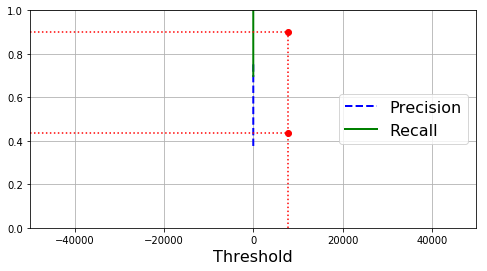

In [101]:
plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions1, recalls1, thresholds1)
plt.plot([7813, 7813], [0., 0.9], "r:")         
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
plt.plot([7813], [0.9], "ro")                   
plt.plot([7813], [0.4368], "ro")                

plt.show()

In [102]:
(train_predo1 == (y_scores1 > 0)).all()

False

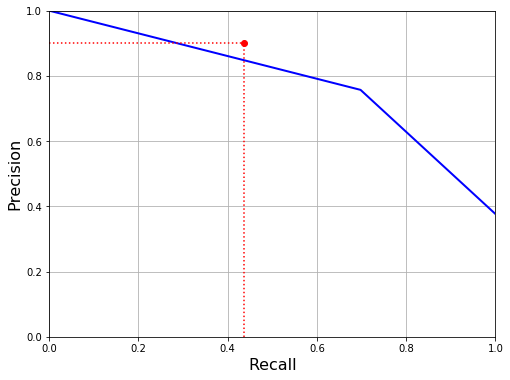

In [103]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions1, recalls1)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")

plt.show()



#### ROC Curve

In [104]:
fpr1, tpr1, thresholds1 = roc_curve(train_labels, y_scores1)

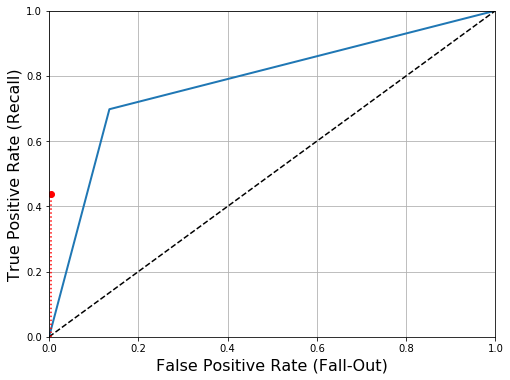

In [105]:
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr1, tpr1)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
                      
plt.show()

In [106]:
roc_auc_score(train_labels, y_scores1)

0.7813130294473578

# 3-Model: KNeighbors Classifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(train_prepared, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Test & Validation:

In [108]:
some_dat6 = train.iloc[:10]
some_labs6 = train_labels.iloc[:10]
some_dat_prepared6 = full_pipeline.transform(some_dat6)
print("Predictions:", neigh.predict(some_dat_prepared6))

print("Labels:", list(some_labs6))

Predictions: [0 0 0 0 0 0 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


#### Cross Val Score:

In [110]:
KN_scores = cross_val_score(neigh, train_prepared, train_labels,
                                scoring="accuracy", cv=10)

display_scores(KN_scores)

Scores: [0.80555556 0.75       0.68055556 0.88888889 0.8028169  0.77464789
 0.78873239 0.78873239 0.71428571 0.85714286]
Mean: 0.785135814889336
Standard deviation: 0.05831505929527516


#### Confusion Matrix

In [112]:
train_predo2 = cross_val_predict(neigh, train_prepared, train_labels, cv=10)

In [113]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(train_labels, train_predo2)

array([[374,  70],
       [ 83, 185]])

#### Precision and Recall

In [114]:
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(train_labels, train_predo2)

0.7254901960784313

In [116]:
>>> recall_score(train_labels, train_predo2) 

0.6902985074626866

#### F-score

In [118]:
>>> from sklearn.metrics import f1_score
>>> f1_score(train_labels, train_predo2)

0.7074569789674954

#### P&R Curve

In [119]:
y_scores2 = cross_val_predict(neigh, train_prepared, train_labels, cv=3)

In [120]:
from sklearn.metrics import precision_recall_curve

precisions2, recalls2, thresholds2 = precision_recall_curve(train_labels, y_scores2)

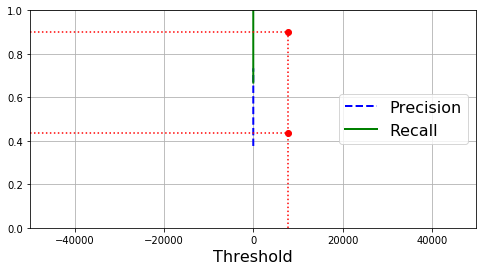

In [121]:
plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2)
plt.plot([7813, 7813], [0., 0.9], "r:")         
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
plt.plot([7813], [0.9], "ro")                   
plt.plot([7813], [0.4368], "ro")                

plt.show()

In [122]:
(train_predo2 == (y_scores2 > 0)).all()

False

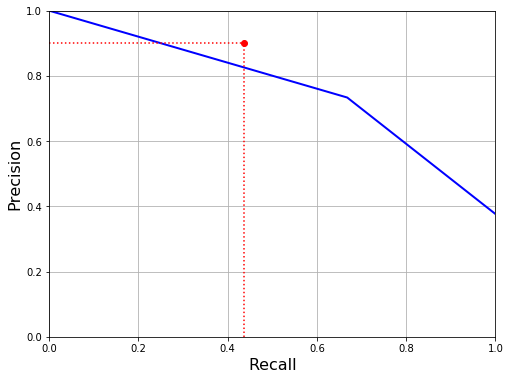

In [123]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions2, recalls2)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")

plt.show()

#### ROC Curve

In [124]:
fpr2, tpr2, thresholds2 = roc_curve(train_labels, y_scores2)

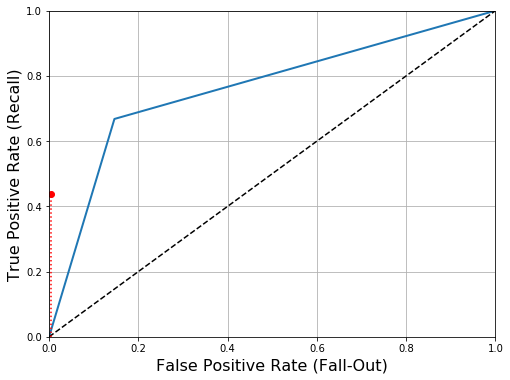

In [125]:
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr2, tpr2)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
                      
plt.show()

In [126]:
roc_auc_score(train_labels, y_scores2)

0.7607570256823988

# 4-Model: Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

log_reg.fit(train_prepared, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

#### Test & Validation:

In [130]:
some_dat99 = train.iloc[:10]
some_labs99 = train_labels.iloc[:10]
some_dat_prepared99 = full_pipeline.transform(some_dat99)
print("Predictions:", log_reg.predict(some_dat_prepared99))

print("Labels:", list(some_labs99))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


#### Cross Val Score:

In [131]:
log_scores = cross_val_score(log_reg, train_prepared, train_labels,
                                scoring="accuracy", cv=10)
display_scores(log_scores)

Scores: [0.84722222 0.77777778 0.72222222 0.875      0.83098592 0.74647887
 0.74647887 0.71830986 0.75714286 0.87142857]
Mean: 0.7893047171920411
Standard deviation: 0.057927075711272334


### Confusion Matrix

In [132]:
train_predo3 = cross_val_predict(log_reg, train_prepared, train_labels, cv=10)

In [133]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(train_labels, train_predo3)

array([[382,  62],
       [ 88, 180]])

#### Precision and Recall

In [134]:
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(train_labels, train_predo3)

0.743801652892562

In [135]:
>>> recall_score(train_labels, train_predo3) 

0.6716417910447762

#### F-score

In [136]:
>>> from sklearn.metrics import f1_score
>>> f1_score(train_labels, train_predo3)

0.7058823529411764

#### P&R Curve

In [137]:
y_scores3 = cross_val_predict(log_reg, train_prepared, train_labels, cv=10)

In [138]:
from sklearn.metrics import precision_recall_curve

precisions3, recalls3, thresholds3 = precision_recall_curve(train_labels, y_scores3)

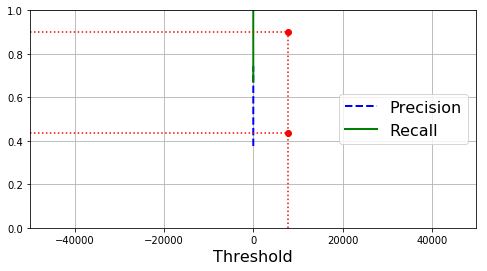

In [139]:
plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions3, recalls3, thresholds3)
plt.plot([7813, 7813], [0., 0.9], "r:")         
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")
plt.plot([7813], [0.9], "ro")                   
plt.plot([7813], [0.4368], "ro")                

plt.show()

In [140]:
(train_predo3 == (y_scores3 > 0)).all()

True

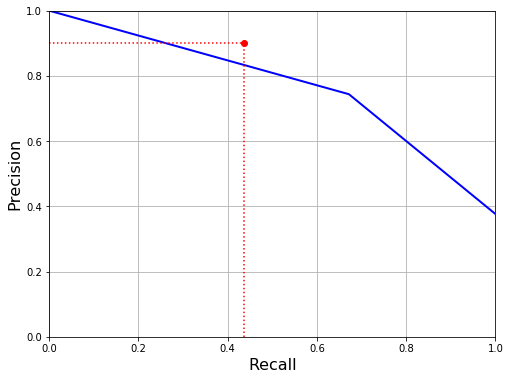

In [141]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions3, recalls3)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")

plt.show()

#### ROC Curve

In [142]:
fpr3, tpr3, thresholds3 = roc_curve(train_labels, y_scores3)

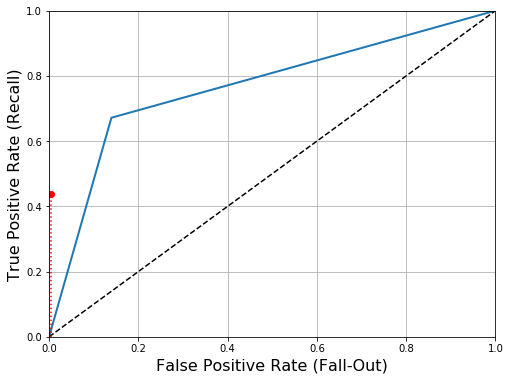

In [143]:
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr3, tpr3)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
                      
plt.show()

In [144]:
roc_auc_score(train_labels, y_scores3)

0.7660010757025681

# Fine-Tuning the Models

In [161]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_clf = RandomForestClassifier()

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(train_prepared, train_labels)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: max_features must be in (0, n_features]